In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping , Callback
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [7]:
data_path = os.path.join('./data')
train_path = os.path.join('./data' , 'train.csv')
test_path = os.path.join('./data' , 'test.csv')
batch = 32
lr = 1e-3
epoch =3

In [8]:
os.listdir(data_path)

['train.csv', 'test.csv']

In [9]:
train_csv = pd.read_csv(train_path)
test_csv = pd.read_csv(test_path)

In [10]:
train_csv.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_csv.shape

(42000, 785)

In [12]:
train_csv.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
train_csv.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Text(0, 0.5, 'frequency')

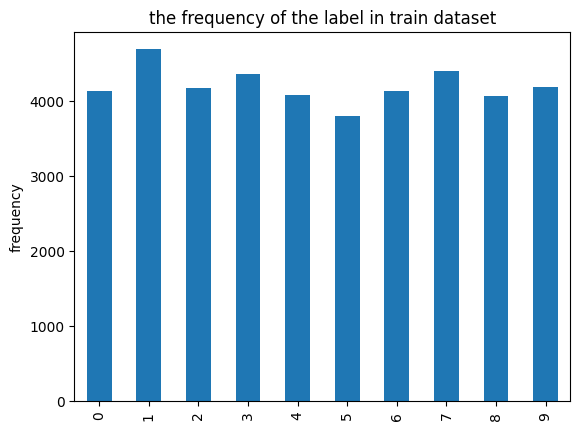

In [14]:
"""visulize the data """
train_csv['label'].value_counts().sort_index().plot(kind="bar")
plt.title('the frequency of the label in train dataset')
plt.ylabel('label')
plt.ylabel('frequency')

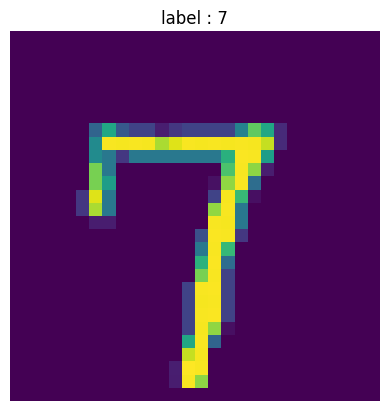

In [15]:
#visulize an a image  with it's label
def show_ith_image(data,i , labels=True) :
    if (labels == True):
        image = np.array(data.drop('label', axis=1).iloc[i])
        label = data['label'][i]
    else :
        image = np.array(data.iloc[i])
        label = "none"
    image = image.reshape(28,28)
    plt.imshow(image)
    plt.title(f'label : {label}')
    plt.axis('off')
show_ith_image(train_csv,6)

In [16]:
x_train = train_csv.drop('label', axis=1)
y_train = train_csv['label']
y_train = pd.get_dummies(y_train ,dtype='float32')

In [17]:
from sklearn.model_selection import train_test_split
def split_data(x , y) :
    x_train ,x_val , y_train , y_val  = train_test_split(x , y  ,test_size=0.15 , shuffle=True , random_state=42)
    return x_train , x_val , y_train , y_val

In [18]:
x_train , x_val , y_train , y_val = split_data(x_train, y_train)

In [19]:
y_val

,0,1,2,3,4,5,6,7,8,9
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37902,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10035,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16356,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
!pip install tqdm

In [21]:
from tqdm import tqdm
def load_data(x_data ,y_data ) :
    images = []
    labels = []
    size , j = x_data.shape
    for i in tqdm(range(0,size)) :
        img = np.array(x_data.iloc[i])
        resized_img = img.reshape(28,28)
        IMG = cv2.resize(np.array(resized_img, dtype='float32'), (32,32))
        images.append(IMG)
        labels.append(np.array(y_data.iloc[i]))
    return images,labels



In [22]:
"""split our data """
train_images , train_labels = load_data(x_train,y_train)
val_images , val_labels = load_data(x_val , y_val)

100%|██████████| 6300/6300 [00:01<00:00, 3633.54it/s]


In [23]:
IMG = cv2.resize(np.array(train_images[0], dtype='float32'), (32,32))
IMG.shape

(32, 32)

In [24]:
"""train data pipline"""
train_data= tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.batch(batch_size=32).prefetch(-1)
"""val data pipline"""
val_data= tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_data = val_data.batch(batch_size=32).prefetch(-1)

In [25]:
"""check the demension """
for img , label in train_data :
    print(img.shape , label.shape)
    break

(32, 32, 32) (32, 10)


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout , Conv2D  , MaxPooling2D , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

def build_model(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
    print(model.summary())
    return model

In [33]:
model = build_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [36]:
early_stop = EarlyStopping(monitor='val_loss' , restore_best_weights=True, patience=1)
callbacks = [early_stop]
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
   metrics =tf.keras.metrics.CategoricalAccuracy(),
)
history = model.fit(train_data ,validation_data = val_data , epochs = 5 , callbacks=callbacks)

Epoch 1/5
1116/1116 [==============================] - 46s 39ms/step - loss: 0.0957 - categorical_accuracy: 0.9761 - val_loss: 0.0635 - val_categorical_accuracy: 0.9819
Epoch 2/5
1116/1116 [==============================] - 45s 41ms/step - loss: 0.0757 - categorical_accuracy: 0.9800 - val_loss: 0.0616 - val_categorical_accuracy: 0.9840
Epoch 3/5
1116/1116 [==============================] - 44s 39ms/step - loss: 0.0689 - categorical_accuracy: 0.9824 - val_loss: 0.0466 - val_categorical_accuracy: 0.9878
Epoch 4/5
1116/1116 [==============================] - 45s 40ms/step - loss: 0.0619 - categorical_accuracy: 0.9844 - val_loss: 0.0554 - val_categorical_accuracy: 0.9860


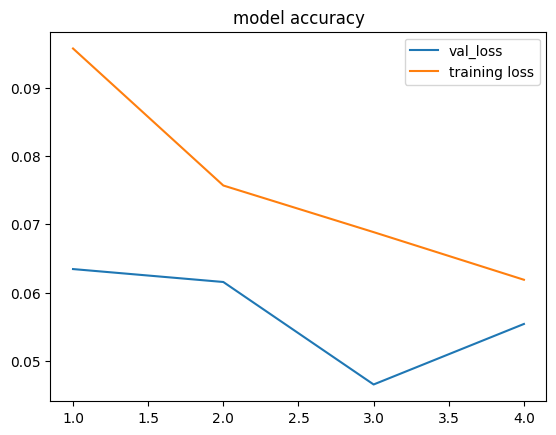

In [37]:
"""plot val and training loss """
plt.plot(np.arange(1,5) , history.history['val_loss'] , label='val_loss')
plt.plot(np.arange(1,5) , history.history['loss'] , label='training loss')
plt.legend()
plt.title('model accuracy')
plt.show()

In [38]:
test_data = pd.read_csv(test_path)
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_data.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

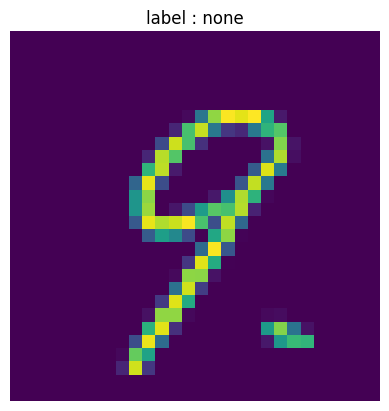

In [40]:
show_ith_image(test_data, 2 , False)

In [41]:
test_image = test_data.iloc[2]
test_image = np.array(test_image)
test_image = test_image.reshape(28,28)
test_image = cv2.resize(np.array(test_image , dtype='float32') , (32,32))
test_image = np.expand_dims(test_image , axis=0)
predicted =  model.predict(test_image)
predicted = np.array(predicted)
predicted = np.argmax(predicted)
print(predicted)

1/1 [==============================] - 0s 123ms/step
9


In [42]:
def test_data_preprocess(data) :
    size ,_ = data.shape
    predections = []
    for i in tqdm(range(size)) :
        test_image = test_data.iloc[i]
        test_image = np.array(test_image)
        test_image = test_image.reshape(28,28)
        test_image = cv2.resize(np.array(test_image , dtype='float32') , (32,32))
        test_image = np.expand_dims(test_image , axis=0)
        predicted =  model.predict(test_image , verbose=0)
        predicted = np.array(predicted)
        predicted = np.argmax(predicted)
        predections.append(predicted)
    return predections

In [43]:
predections = test_data_preprocess(test_data[:300])#we use 300 instead of 28000

100%|██████████| 300/300 [00:30<00:00,  9.85it/s]


In [44]:
labels = np.array(predections)
np.count_nonzero(np.isnan(labels))

0

In [46]:
test_data = test_data[:300]

In [47]:
test_data['label'] = labels

<ipython-input-47-0fc2218bf9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['label'] = labels


In [48]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


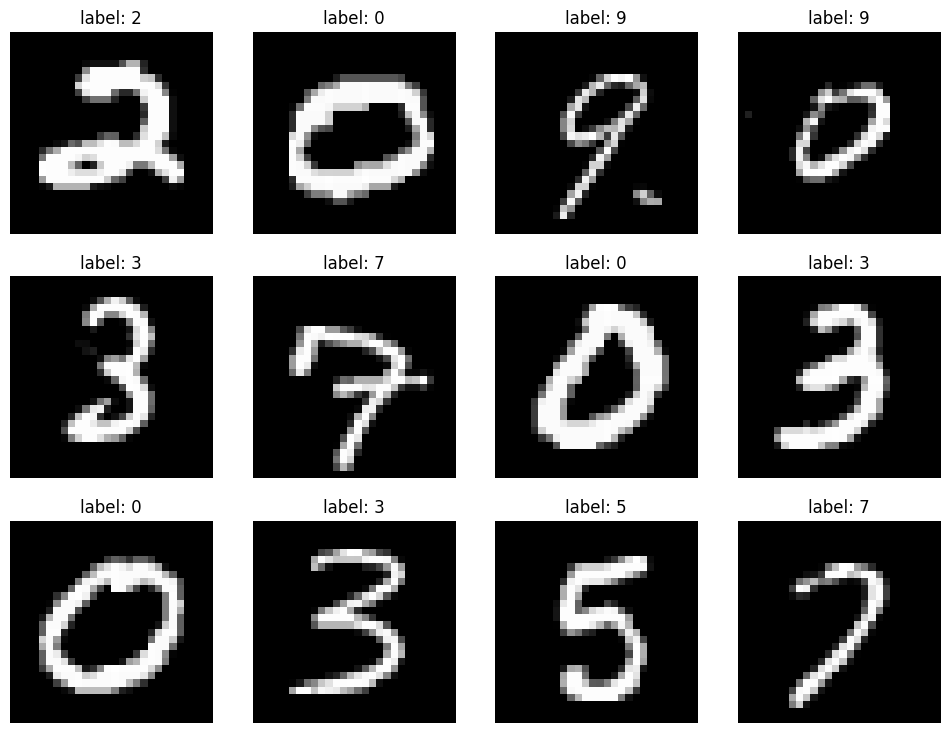

In [49]:
fig, ax = plt.subplots(3, 4, figsize=(12, 9))

images = test_data.drop('label', axis=1)
labels = test_data['label']

for i in range(3):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(images.iloc[idx].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'label: {labels.iloc[idx]}')
        ax[i, j].axis('off')

plt.show()

In [50]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(labels) + 1),
    'Labels': labels
})

submission_df.to_csv('./data/result.csv', index=False)